# Integração numérica

Pare encontrarmos a solução no tempo da equação $ m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)$ iremos utilizar a função odeint do scipy.

Vendo o help da função odeint (scipy.integrate.odeint?):
```
scipy.integrate.odeint(func, y0, t,...)

Parameters:	
func : callable(y, t0, ...)

Computes the derivative of y at t0.

y0 : array

Initial condition on y (can be a vector).

t : array

A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence.
```

Observando o help também notamos:
> Solves the initial value problem for stiff or non-stiff systems of _**first order**_ ode-s:

Para transformamos a equação de segunda ordem em um sistema de primeira ordem utilizamos as variáveis $x_1 = x(t)$ e $x_2 = \dot{x}(t)$.

\begin{equation}
m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)\\
\downarrow\\
\dot{x}_1(t) = x_2(t)\\
\dot{x}_2(t) = \frac{f(t)}{m} -\frac{c}{m}\ x_2(t) - \frac{k}{m}\ x_1(t)
\end{equation}

Esse sistema pode ser descrito com matrizes:
\begin{equation}
{\bf A} = 
\left[ \matrix{
0 & 1 \\
-\frac{k}{m} & -\frac{c}{m}  \\
} \right] \ \ \ \ \ 
{\bf x}(t) = 
\left[ \matrix{
x_1(t) \\
x_2(t) \\
} \right] \\
\\
\
\\
\dot{\bf x}(t) = A{\bf x}(t) + B{\bf f}(t)
\end{equation}

In [1]:
import scipy as sp
from scipy.integrate import odeint
from matplotlib import use
use('nbagg')
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


### Escrever a função que calcula a derivada de x em t:

In [2]:
sp.sqrt(20000/100)

14.142135623730951

In [3]:
def func(x, t, a):
    m=100
    c=20
    k=20000
    m0e = 150 #  m0 * e
    #  accel 'a'
    maxw = 40
    if a*t < maxw:
        ddphi = a
        dphi = a*t
        phi = (a*t**2)/2
    else:
        ddphi = 0
        dphi = maxw
        phi = maxw*t
    A = sp.array([[0, 1],
                  [-k/m, -c/m]])    
    # calcular dxdt
    f = [0, m0e*dphi**2*sp.cos(phi)/m + m0e*ddphi*sp.sin(phi)/m]
    dxdt = A @ x + f
    
    return dxdt

### Determinar condições iniciais e o intervalo de tempo:

In [4]:
# Condições iniciais
x0=0.0
v0=0.0

#Criar array com condições iniciais
z0 = [x0, v0]

# Criar array com o tempo
tf = 60
t = sp.linspace(0, tf, 5000)

### Calcular a solução

In [5]:
def calc(a):
    sol = odeint(func, z0, t, args=(a,))
    plt.plot(t, sol[:, 0], label='x1(t)')
    plt.ylim(-20, 20)
    plt.legend()
    plt.xlabel('t')
    plt.show()

### Plotar solução deslocamento x tempo:

<IPython.core.display.Javascript object>


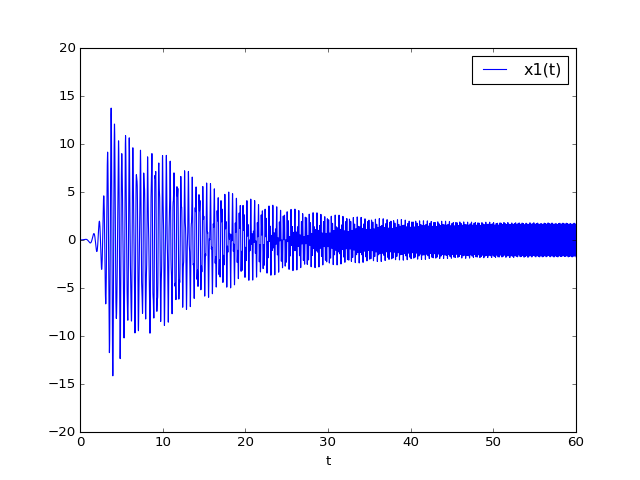

<function __main__.calc>

In [6]:
interact(calc, a=(3, 8, 0.2))